## Decision Tree Exercises

### Introduction 
We will be using the wine quality dataset for these exercises.  This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol.  It also contains a quality metric (3-9, with highest being better) and a color (red or white).  The name of the file is `Wine_Quality_data.csv`

### Prequisites 
Install pydotplus and seaborn in your own virtual environment 

`!pip install pydotplus
!pip install seaborn`

In [2]:
from __future__ import print_function
import os 
data_path = ['data']

In [3]:
import pandas as pd 
import numpy as np 

filepath = os.sep.join(data_path + ['Wine_Quality_Data.csv'])
data = pd.read_csv(filepath, sep = ',')

In [4]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

Convert the color feature to an integer. This is a quick way to do it using Pandas.

In [6]:
data['color'] = data.color.replace('white', 0).replace('red', 1).astype(np.int)

### Question 2
* Use `StratifiedShuffleSplit` to split data into train and test sets that are stratified by wine quality. If possible, preserve the indices of the split for question 5 below. 
* Check the percent composition of each quality level for both the train and test data sets. 

In [7]:
# ALL data coluns except for color 
feature_cols = [x for x in data.columns if x not in 'color']
feature_cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data into two parts with 1000 points in the test data 
# This creates a generator 
strat_shuff_split = StratifiedShuffleSplit(n_splits = 1, # number of splitting iterations
                                           test_size = 1000, 
                                           random_state = 42)

# Get the index values from the generator 
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], 
                                                   data['color']))



KeyError: "['fixed_acidity' 'volatile_acidity' 'citric_acid' 'chlorides'\n 'free_sulfur_dioxide' 'total_sulfur_dioxide' 'density' 'pH' 'sulphates'\n 'alcohol' 'quality' 'color'] not in index"

In [9]:
# Create the data sets 
X_train = data.loc[train_idx, feature_cols] # or data.iloc[train_idx, :-1]
y_train = data.loc[train_idx, 'color'] # or data.iloc[train_idx, -1:]

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'color']

Now check the percent composition of each quality level in the train and test data sets. The data set is mostly white wine, as can be seen below. 

In [10]:
y_train.value_counts(normalize = True).sort_index()

0    0.753866
1    0.246134
Name: color, dtype: float64

In [11]:
y_test.value_counts(normalize = True).sort_index()

0    0.754
1    0.246
Name: color, dtype: float64

In [12]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
2830,7.9,0.41,0.37,4.5,0.030,40.0,114.0,0.99200,3.17,0.54,12.4,7
2344,7.4,0.20,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6
1368,8.0,0.77,0.32,2.1,0.079,16.0,74.0,0.99656,3.27,0.50,9.8,6
5519,7.4,0.25,0.37,2.6,0.050,24.0,132.0,0.99138,3.04,0.53,11.2,6
4039,6.8,0.46,0.26,6.3,0.147,49.0,159.0,0.99434,3.14,0.47,10.0,5


### Question 3
* Fill a decision tree classifier with no set limits on maximum depth, features, or leaves. 
* Determine how many nodes are present and what the depth of this (very large) tree is. 
* Using this tree, measure the prediction error in the train and test data sets. What do you think is going on here based on the differences in prediction error? 

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt = dt.fit(X_train, y_train)

The number of nodes and the maximum actual depth. 

In [14]:
dt.tree_.node_count, dt.tree_.max_depth 

(145, 17)

There are 161 nodes and a maximum depth of 19.  A function to return error metrics. 

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label): 
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred), 
                      'recall': recall_score(y_true, y_pred), 
                      'f1': f1_score(y_true, y_pred)}, 
                      name = label)

In [16]:
# error on the training and test data sets 

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'), 
                                   measure_error(y_test, y_test_pred, 'test')], 
                                   axis = 1)

train_test_full_error

,train,test
accuracy,0.999636,0.981000
f1,0.999261,0.961616
precision,0.999261,0.955823
recall,0.999261,0.967480


* The decision tree predicts a little better on the training data than the test data, which is consistent with (mild) overfitting. 
* Also notice the perfect recall score for the training data. 
* In many instances, this prediction difference is even greater than that seen here. 

### Question 4 
* Using gridsearch with cross validation, find a decision tree that performs well on the test data set. Use a different variable name for this decision tree model than in question 3 so that both can be used in question 6. 
* Determine the number of nodes and the depth of this tree. 
* Measure the errors on the training and test sets as before and compare them to those from the tree in question 3. 

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, dt.tree_.max_depth + 1, 2), 
              'max_features': range(1, len(dt.feature_importances_) + 1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state = 42), 
                  param_grid = param_grid, 
                  scoring = 'accuracy', 
                  n_jobs = -1)


In [18]:
GR = GR.fit(X_train, y_train)

In [19]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(149, 13)

The number of nodes is 119 and the maximum depth of the tree is 9. 

In [20]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'), 
                                 measure_error(y_test, y_test_pred_gr, 'test')], 
                                 axis = 1)
train_test_gr_error

,train,test
accuracy,0.999090,0.986000
f1,0.998152,0.971193
precision,0.998521,0.983333
recall,0.997783,0.959350


The test scores are slightly better than the previous ones, it seems like the 1st example is actually overfitting the data very slightly more than the 2nd decision tree (which has less nodes and less depth). 

### Question 5 
* Re-split the data into X and y parts, this time with `residual_sugar` being the predicted (y) data. *Note*: if the indices were preserved from the `StratifiedShuffleSplit` output in question 2, they can be used again to split the data. 
* Using grid search with cross validation, find a decision tree **regression model** that performs well on the test data set. 
* Measure the errors on the training and test sets using mean squared error. 
* Make a plot of actual vs predicted `residual_sugar`. 

In [21]:
feature_cols = [x for x in data.columns if x != 'residual_sugar']

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'residual_sugar']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'residual_sugar']

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Fit decision tree regressor to get max depth and max number features 
dr = DecisionTreeRegressor().fit(X_train, y_train)

# Create a range of depth and number of features for parameter grid to test 
param_grid = {'max_depth': range(1, dr.tree_.max_depth + 1, 2), 
              'max_features': range(1, len(dr.feature_importances_) + 1)}

# Tune depth and feature number hyperparameters using GridSearchCV
GR_sugar = GridSearchCV(DecisionTreeRegressor(random_state = 42), 
                        param_grid = param_grid, 
                        scoring = 'neg_mean_squared_error', 
                        n_jobs = -1) 

GR_sugar = GR_sugar.fit(X_train, y_train)

In [23]:
GR_sugar.best_estimator_.tree_.node_count, GR_sugar.best_estimator_.tree_.max_depth

(7585, 25)

The number of nodes is 1363 and the maximum depth of the tree is 11.  This tree has lots of nodes, which is not surprising given the continuous data. 


In [24]:
from sklearn.metrics import mean_squared_error 

y_train_pred_gr_sugar = GR_sugar.predict(X_train)
y_test_pred_gr_sugar = GR_sugar.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred_gr_sugar), 
                                       'test': mean_squared_error(y_test, y_test_pred_gr_sugar)}, 
                                      name = 'MSE').to_frame().T

train_test_gr_sugar_error

,test,train
MSE,4.60266,0.000124


Used mean squared error because it is continuous data.  These are the train and test errors for the data sets. The test error is much higher than the training error, which leads me to believe that this model is overfitting the data. 

In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

% matplotlib inline 

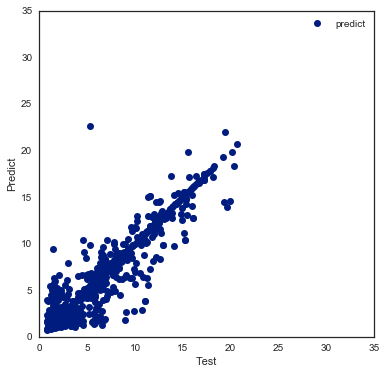

In [26]:
fig = plt.figure(figsize = (6,6))
ax = plt.axes()

ph_test_predict = pd.DataFrame({'test': y_test.values, 
                                'predict': y_test_pred_gr_sugar}).set_index('test').sort_index()
                                                                # set_index sets 'test' as the index
                                                                # sort_index sorts by index 

ph_test_predict.plot(marker = 'o', ls = '', ax = ax)
ax.set(xlabel = 'Test', ylabel = 'Predict', xlim = (0, 35), ylim = (0,35)); 

A plot of the actual vs predicted `residual_sugar`.  There is some correspondence between the actual and predicted values, but since our model is likely overfitting, it did not generalize incredibly well to test data. 

### Question 6 (Optional) 
This question is optional as it requires an additional command line program (GraphViz) and Python library (PyDotPlus). GraphViz can be installed with a package manager on Linus and Mac. For PyDotPlus, either `pip` or `conda (conda install -c conda-forge pydotplus`) can be used to install the library. 
Once these programs are installed: 
* Create a visualization of the decision tree from question 3, where wine color was predicted and the number of features and/or splits are not limited. 
* Create a visualization of the decision tree from question 4, where wine color was predicted but a grid search was used to find the optimal depth and number of features. 

The decision tree from question 5 will likely have too many nodes to visualize. 

In [27]:
from io import StringIO
from IPython.display import Image, display 

from sklearn.tree import export_graphviz

In [28]:
try: 
    import pydotplus
    pydotplus_installed = True 
    
except: 
    print('PyDotPlus must be installed to execute the remainder of the cells associated with this question.')
    print('Please see the instrucions for this question for details.')
    pydotplus_installed = False 

In [29]:
# Tree from Question 3 

if pydotplus_installed: 
    
    # Create an output destination for the file 
    dot_data = StringIO()
    
    export_graphviz(dt, out_file = dot_data, filled = True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    print(graph) 
    
    # View the tree image 
    filename = 'wine_tree.png'
    graph.write_png(filename)
    img = Image(filename = filename)
    display(img)
    
else: 
    print('This cell not executed because PyDotPlus could not be loaded.')

InvocationException: GraphViz's executables not found

### Question 7 
* Import the iris data and examine the features. 
* We will be using all of them to predict species, but the species feature will need to be integer encoded. 
* Convert species feature to an integer. 

In [31]:
filepath = os.sep.join(data_path + ['Iris_Data.csv'])
data = pd.read_csv(filepath, sep = ',')

In [32]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['species_le'] = le.fit_transform(data['species'])

### Question 8 
* Use `StratifiedShuffleSplit` to split data into train and test sets that are stratifies by species. If possible, preserve the indices of the split for question 11 below.
* Check the percent composition of each species level for both the train and test data sets. 

In [41]:
feature_cols = list(data.columns[:-2])

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [42]:
strat_shuff_split = StratifiedShuffleSplit(n_splits = 1, 
                                           test_size = 0.3, 
                                           random_state = 42)

# Get the index values from the generator 
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], 
                                                   data['species_le']))

In [46]:
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'species_le']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'species_le']

THe percentage of each species in the training and test data sets are equally distributed. 

In [49]:
y_train.value_counts(normalize = True).sort_index()

0    0.333333
1    0.333333
2    0.333333
Name: species_le, dtype: float64

In [50]:
y_test.value_counts(normalize = True).sort_index()

0    0.333333
1    0.333333
2    0.333333
Name: species_le, dtype: float64

### Question 9 
* Fit a decision tree classifier with no set limits on maximum depth, features, or leaves. 
* Determine how many nodes are present and what the depth of tihs (very large) tree is. 
* Using this tree, measure the prediction error in the train and test `iris_data` sets. What do you think is going on here based on the differences in prediction error? 


In [51]:
dt = DecisionTreeClassifier(random_state = 42)
dt = dt.fit(X_train, y_train)

In [52]:
dt.tree_.node_count, dt.tree_.max_depth 

(15, 5)

In [55]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)


In [69]:
"""
def measure_error(y_true, y_pred, label): 
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred), 
                      'recall': recall_score(y_true, y_pred), 
                      'f1': f1_score(y_true, y_pred)}, 
                      name = label)
"""

def measure_error_new(y_true, y_pred, label): 
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred)},                  
                      name = label)

In [70]:
train_test_full_error = pd.concat([measure_error_new(y_train, y_train_pred, 'train'), 
                                   measure_error_new(y_test, y_test_pred, 'test')], 
                                  axis = 1)

train_test_full_error

,train,test
accuracy,1.0,0.911111


Because of the almost 10% difference in error rates, there is likely overfitting of our model to the training set due to the large number of nodes and depth relative to the small dataset. 

The decision tree predicts better on the training data than the test data, which is consistent with (mild) overfitting.  

Also notice the perfect recall for the training iris_data. In many instances, this predicion difference is even greater than that seen here.

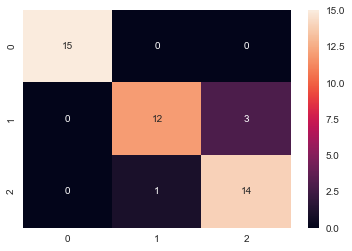

In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot = True, fmt = 'd'); 

In [75]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred)
print (report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.92      0.80      0.86        15
          2       0.82      0.93      0.87        15

avg / total       0.92      0.91      0.91        45



### Question 10 
* Use grid search with cross validation, find a decision tree that performs well on the test iris_data set. Use a different variable name for this decision tree model than in question 9 so that both can be used in question 12. 
* Determine the number of nodes and the depth of this tree. 
* Measure the errors on the training and test sets as before and compare them to those from the tree in question 9. 


In [76]:
param_grid = {'max_depth': range(1, dt.tree_.max_depth + 1, 2), 
              'max_features': range(1, len(dt.feature_importances_) + 1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state = 42), 
                  param_grid = param_grid, 
                  scoring = 'accuracy', 
                  n_jobs = -1)

In [77]:
GR = GR.fit(X_train, y_train)

The number of nodes and max depth of the tree: 

In [78]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(9, 3)

In [79]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'), 
                                 measure_error(y_test, y_test_pred_gr, 'test')], 
                                 axis = 1)
train_test_gr_error

,train,test
accuracy,0.971429,0.888889


These test errors are just as bad as the previous ones.  Both models are clearly overfitting the data. 

### Question 11 
* Re-split the `iris_data` into X and y parts, this time with species being the predicted (`y`) `iris_data`. *Note*: if the indices were preserved from the `StratifiedShuffleSplit()` output in question 8, they can be used again to split the `iris_data`. 
* Using grid search with cross validation, find a decision tree **regression model** that performs well on the test `iris_data` set. 
* Measure the errors on the training and test sets using mean squared error. 
* Make a plot of actual vs. predicted species. 

In [84]:
dr = DecisionTreeRegressor().fit(X_train, y_train)

param_grid = {'max_depth': range(1, dr.tree_.max_depth + 1, 2), 
              'max_features': range(1, len(dr.feature_importances_) + 1)}

GR_reg = GridSearchCV(DecisionTreeRegressor(random_state = 42), 
                      param_grid = param_grid, 
                      scoring = 'neg_mean_squared_error',
                      n_jobs = -1)

GR_reg = GR_reg.fit(X_train, y_train)

In [85]:
GR_reg.best_estimator_.tree_.node_count, GR_reg.best_estimator_.tree_.max_depth

(9, 3)

In [86]:
y_train_pred = GR_reg.predict(X_train)
y_test_pred = GR_reg.predict(X_test)

train_test_GRreg_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred), 
                                    'test': mean_squared_error(y_test, y_test_pred)}, 
                                   name = 'MSE').to_frame().T

train_test_GRreg_error

,test,train
MSE,0.022453,0.014006


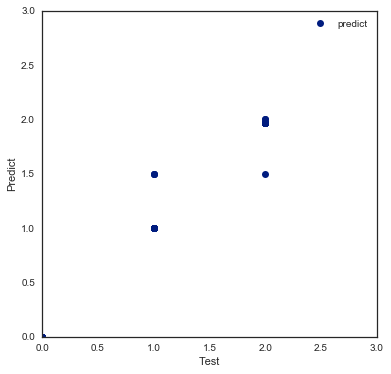

In [90]:
# Plot of actual vs predicted species 
fig = plt.figure(figsize = (6,6))
ax = plt.axes()

ph_test_predict = pd.DataFrame({'test': y_test.values, 
                                'predict': y_test_pred}).set_index('test').sort_index()
                                                               

ph_test_predict.plot(marker = 'o', ls = '', ax = ax)
ax.set(xlabel = 'Test', ylabel = 'Predict', xlim = (0, 3), ylim = (0,3)); 

## Question 12 *(Optional)*

This question is optional as it requires an additional command line program (GraphViz) and Python library (PyDotPlus). GraphViz can be installed with a package manager on Linux and Mac. For PyDotPlus, either `pip` or `conda` (`conda install -c conda-forge pydotplus`) can be used to install the library.

Once these programs are installed:

* Create a visualization of the decision tree from question 9, where wine species was predicted and the number of features and/or splits are not limited.
* Create a visualization of the decision tree from question 10, where wine species was predicted but a grid search was used to find the optimal depth and number of features.

The decision tree from question 11 will likely have too many nodes to visualize.

The tree from question 9.

The tree fit with cross validation from question 10. This tree is much shallower than the previous one. 